# Lab 8 - PyTorch

Welcome to this week's lab on PyTorch! In this lab, you are going to explore PyTorch, a popular open-source library widely used for applications such as computer vision and natural language processing. PyTorch is known for its ease of use, efficiency, and dynamic computational graph.

## Part 1: Getting Started with PyTorch
First, ensure you have PyTorch installed in your environment. You can either use a virtual environment or docker. Check out the PyTorch's installation guide: https://pytorch.org/get-started/locally/

### Basic Concepts
#### Tensors
Tensors are the fundamental unit of data in PyTorch, similar to NumPy arrays but with GPU acceleration.

In [1]:
import torch

# Create a tensor
tensor = torch.tensor([[1, 2], [3, 4]])
print(tensor)

tensor([[1, 2],
        [3, 4]])


#### Operations
Operations in PyTorch allow you to perform mathematical computations on tensors.

In [2]:
# Addition
tensor_add = tensor + 5
print(tensor_add)

# Multiplication
tensor_mul = tensor * 2
print(tensor_mul)

tensor([[6, 7],
        [8, 9]])
tensor([[2, 4],
        [6, 8]])


#### Autograd
PyTorch's automatic differentiation engine, `torch.autograd`, is one of its most powerful features, enabling the automatic computation of gradients—essential for backpropagation in neural networks

In [4]:
# Create tensors with requires_grad=True to track computation
x = torch.ones(2, 2, requires_grad=True)
y = x + 2
z = y * y * 3
out = z.mean()

# Compute gradients
out.backward()
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


### Find out more about the concept of gradient in the contecxt of backpropagation. Explain briefly what gradients are and how they are used in backpropagation.


In the context of backpropagation, a gradient is a vector of partial derivatives of a function with respect to its input variables. In the case of neural networks, the function is typically a loss or cost function, which measures the difference between the predicted output of the network and the actual target values. The gradient quantifies how much the loss function changes with respect to small changes in the network's weights and biases.


Gradients are used in backpropagation to perform automatic differentiation, which is the process of calculating the derivatives of the loss function with respect to each weight and bias in the neural network. This information is then used to update the parameters of the network in a way that minimizes the loss function.

The backpropagation algorithm works by first performing a forward pass through the network to compute the output and the loss. Then, during the backward pass, it computes the gradient of the loss function with respect to each parameter by applying the chain rule of calculus. This backward flow of the error information allows for efficient computation of the gradient at each layer versus the naive approach.

Once the gradients are computed, they are used by an optimization algorithm, such as gradient descent, to update the model weights. The optimization algorithm takes steps in the opposite direction of the gradient to reduce the loss. The size of the steps is controlled by a hyperparameter known as the learning rate.

In summary, gradients in backpropagation provide the necessary information to adjust the neural network's parameters (weights and biases) to minimize the loss function, thereby improving the model's predictions.

#### Building a Simple Model


In [6]:
# Define a linear model
model = torch.nn.Linear(1, 1)

# Loss function and optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

### Check out PyTorch documentation and explain what are the inputs we provided in `torch.nn.Linear`.

- The inputs provided in torch.nn.Linear are the number of input features (in_features) and the number of output features (out_features). In the given example, model = torch.nn.Linear(1, 1), the input features is 1 and the output features is 1.
  
-  The torch.nn.Linear(1, 1) line initializes a linear layer with one input feature and one output feature (i.e., a single weight and bias).

- The torch.nn.Linear class is used to create a linear transformation layer in PyTorch. It applies a linear transformation to the incoming data, where the input data has in_features dimensions and the output data has out_features dimensions. The linear transformation is represented by the weight matrix weight() and the bias vector bias(). 

- The torch.nn.Linear class is a fundamental building block in deep learning models, as it allows for the creation of fully connected layers. These layers are used to model the relationships between input features and output features in a wide range of applications, including image classification, natural language processing, and time series analysis.



## Part 2: Implement a Multi-Layer Neural Network with PyTorch

Let's build a multi-layer neural network to classify points into two categories based on their location in a 2D space. This is a step up in complexity and will help illustrate the power of deep neural networks.

### Task 1: Generate Synthetic Data
First, we need to generate some data that isn't linearly separable, which will require the expressiveness of a multi-layer network to classify correctly.

In [13]:
import torch
import numpy as np

# Generating a spiral dataset
N = 100  # number of points per class
D = 2  # dimensionality
K = 2  # number of classes
X = np.zeros((N*K, D))  # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8')  # class labels

for j in range(K):
  ix = range(N*j, N*(j+1))
  r = np.linspace(0.0, 1, N)  # radius
  t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2  # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j

X = torch.from_numpy(X).float()
y = torch.from_numpy(y).long()

### Task 2: Define the Model
You need to define a model with two hidden layers. Each hidden layer will have a `ReLU` activation function for non-linearity. Use `Cross Entropy` as the loss function and use `Adam` as the optimizer.
    

In [15]:
# Define a simple multi-layer network
model = torch.nn.Sequential(
    torch.nn.Linear(2, 100),  # 2 inputs, to 100 neurons in the first hidden layer
    torch.nn.ReLU(),
    torch.nn.Linear(100, 50),  # Second hidden layer, 50 neurons
    torch.nn.ReLU(),
    torch.nn.Linear(50, 2)  # Output layer, 2 outputs for our classes
)

# Loss and optimizer
criterion = torch.nn.CrossEntropyLoss()  # Use CrossEntropyLoss for classification tasks
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

### Task 3: Train the Model
With our data and model defined, let's train the network for `1000` epochs!

In [17]:
# Train the model
# Training loop
for epoch in range(1000):
    # Forward pass: Compute predicted y
    y_pred = model(X)

    # Compute loss
    loss = criterion(y_pred, y)
    
    # Zero gradients, backward pass, and update
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}: loss = {loss.item()}')

Epoch 0: loss = 0.6837788224220276
Epoch 100: loss = 0.014328379184007645
Epoch 200: loss = 0.009679215028882027
Epoch 300: loss = 0.008299149572849274
Epoch 400: loss = 0.007733643054962158
Epoch 500: loss = 0.007506965193897486
Epoch 600: loss = 0.007348588667809963
Epoch 700: loss = 0.0071823750622570515
Epoch 800: loss = 0.007290413603186607
Epoch 900: loss = 0.007160582114011049


### Task 4: Evaluate the Model
To evaluate our model, we will visualize how well it separates the classes in our 2D space.

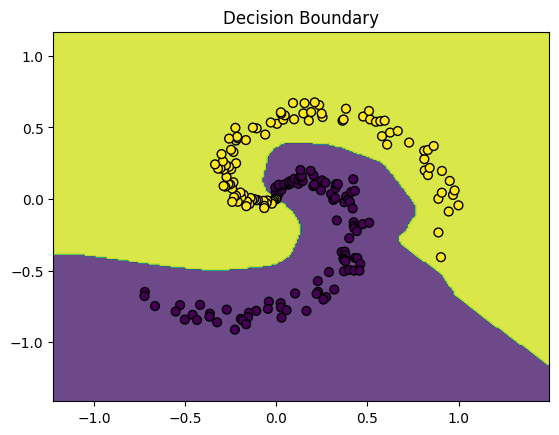

In [18]:
# We will use matplotlib to plot the decision boundary
import matplotlib.pyplot as plt

def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict the function value for the whole grid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

# Model prediction for a numpy array
def predict(X):
    X = torch.from_numpy(X).float()
    y_pred = model(X)
    return np.argmax(y_pred.data.numpy(), axis=1)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(x))
plt.title("Decision Boundary")
plt.show()

## Submission
Submit a link to your completed Jupyter Notebook file hosted on your private GitHub repository through the submission link in Blackboard.